<a href="https://colab.research.google.com/github/Vecheslav-Eremeev/sklearn_projects/blob/main/GMM_gerator_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from keras.datasets import mnist

In [34]:
(digits, _), (_, _) = mnist.load_data()
digits.shape

(60000, 28, 28)

In [35]:
digits = digits.reshape((-1, 784))

In [36]:
digits = digits[:10000]

In [37]:
def plot_digits(data):
  fig, ax = plt.subplots(10, 10, figsize=(14, 14), subplot_kw=dict(xticks=[], yticks=[]))
  for i, axi in enumerate(ax.flat):
    lm = axi.imshow(data[i].reshape(28,28), cmap='binary')

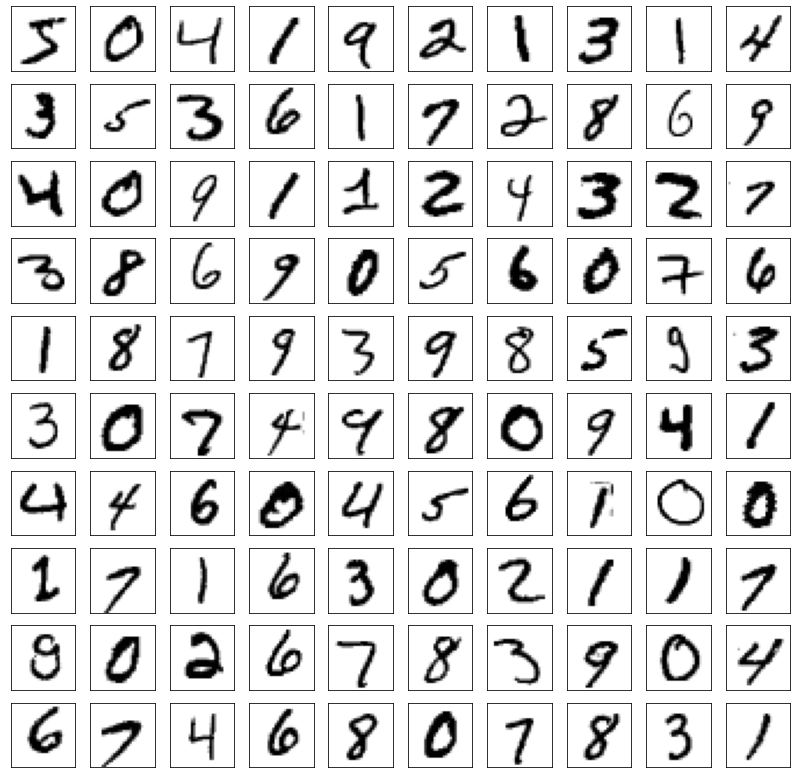

In [38]:
plot_digits(digits)

In [45]:
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits)
data.shape

(10000, 326)

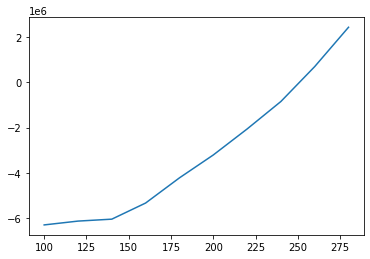

In [53]:
n_components = np.arange(100, 300, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [62]:
gmm = GaussianMixture(100, random_state=0)
gmm.fit(data)
gmm.converged_

True

In [63]:
data_new = gmm.sample(100)

In [64]:
data_new[0].shape

(100, 326)

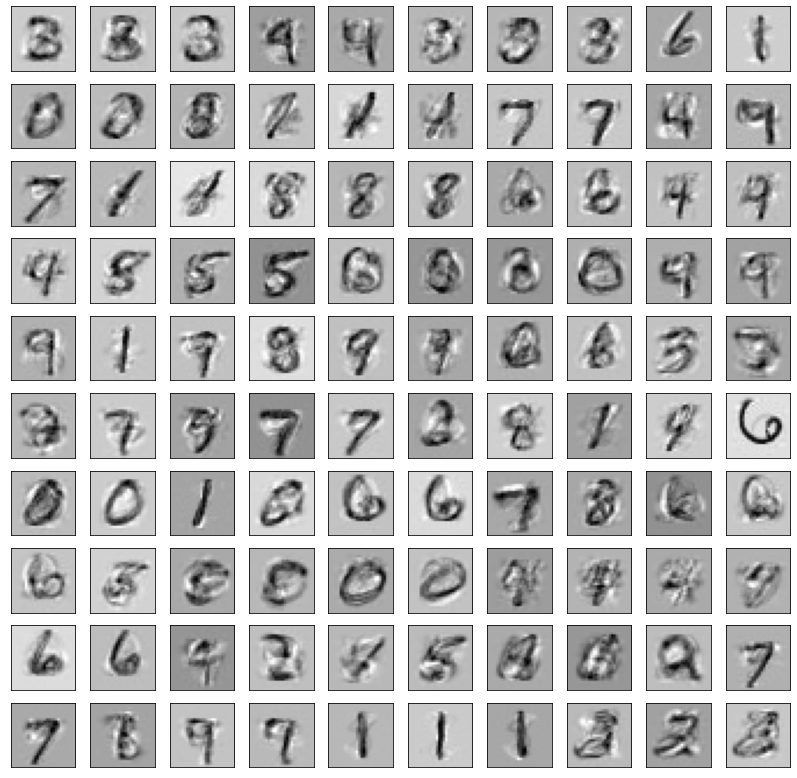

In [65]:
digits_new= pca.inverse_transform(data_new[0])
plot_digits(digits_new)